
# Polynomial Regression Learning Material

Polynomial Regression extends linear regression to model relationships between the independent variable x and the dependent variable y as an nth degree polynomial. It provides a good approximation of the relationship when the relationship is non-linear.

## Introduction

Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted E(y |x), and has been used to describe nonlinear phenomena such as the growth rate of tissues, the distribution of carbon isotopes in lake sediments, and the progression of disease epidemics.

### Formula

The general formula for a polynomial regression is:

$$ y = b_0 + b_1x + b_2x^2 + ... + b_nx^n + \epsilon $$

where:
- $y$ is the predicted outcome,
- $x$ is the predictor,
- $b_0, b_1, ..., b_n$ are the regression coefficients,
- $\epsilon$ is the error term.



## Selecting the Order of the Polynomial

The order of the polynomial is a critical decision in polynomial regression as it determines the complexity of the model. A higher degree can fit the training data better but might lead to overfitting.

### Overfitting and Underfitting

- **Overfitting** occurs when the model is too complex, capturing the noise along with the underlying pattern.
- **Underfitting** happens when the model is too simple to capture the underlying trend of the data.

### Techniques for Order Selection

1. **Cross-validation:** Divides the data into subsets, uses some subsets to train the model and the rest to test it, iterating this process to evaluate the performance of models with different orders.
2. **Information Criteria:** Such as Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC), which penalize models for the number of parameters.

### Theorem: Bias-Variance Tradeoff

The bias-variance tradeoff is an important theorem in machine learning that states that with increasing model complexity, variance increases and bias decreases. The optimal model order minimizes the total error, which is the sum of bias, variance, and irreducible error.



## Example: Polynomial Regression with NumPy and Visualization

We will use NumPy to perform polynomial regression on a sample dataset and visualize the results with matplotlib.


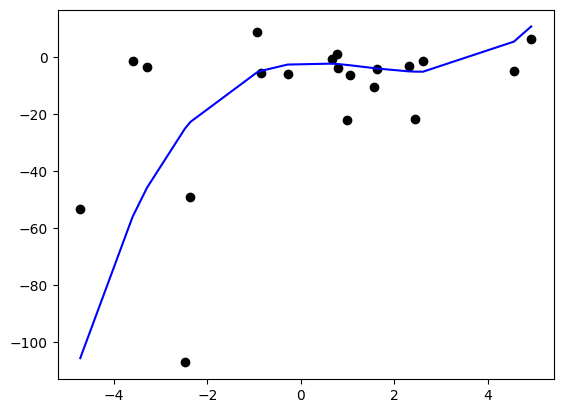

In [1]:

import numpy as np
import matplotlib.pyplot as plt

# Sample data
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# Transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

# Sorting values for plotting
sorted_zip = sorted(zip(x, y_poly_pred))
x, y_poly_pred = zip(*sorted_zip)

plt.scatter(x, y, color='black')
plt.plot(x, y_poly_pred, color='blue')
plt.show()



## Exact Fit with High-Order Polynomial Regression

In some cases, it is possible to fit the dataset exactly using a polynomial regression of high order. This scenario occurs when the polynomial order is equal to or higher than the number of data points minus one. While this might seem desirable, it often leads to overfitting, especially with noisy data.

### Explanation

A polynomial of order \(n\) can perfectly fit \(n+1\) data points by passing through each point exactly. This is because the polynomial equation can adjust its coefficients to match each point's x and y values. However, such a model is likely to perform poorly on unseen data as it captures the noise in the training data as if it were a real pattern.

### Example: Exact Fit with Polynomial Regression


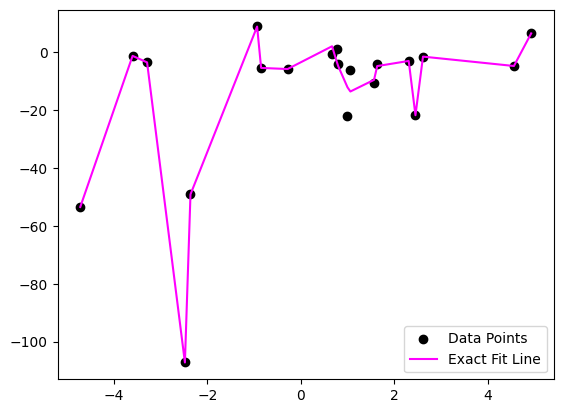

In [3]:

# Assuming the same sample data as before

# Using a polynomial of degree equal to the number of points - 1
degree = len(x) - 1
polynomial_features = PolynomialFeatures(degree=degree)
x_poly_exact = polynomial_features.fit_transform(x)

model_exact = LinearRegression()
model_exact.fit(x_poly_exact, y)
y_poly_pred_exact = model_exact.predict(x_poly_exact)

# Visualization
plt.scatter(x, y, color='black', label='Data Points')
plt.plot(x, y_poly_pred_exact, color='magenta', label='Exact Fit Line')
plt.legend()
plt.show()
